In [3]:
#find snps
#import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


root  = "/Users/bencekover/Library/CloudStorage/OneDrive-Personal/MSci Bahler lab/S.-Pombe-MLPs - Github/"
import numpy as np
import scipy.stats as st
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load Marias data /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Rodriguez-Lopez 2023 deletion library/SupplementaryFile1.xlsx
data = pd.read_excel(root + 'external data/Rodriguez-Lopez 2023 deletion library/SupplementaryFile1.xlsx', sheet_name='All conditions')

#remove rows where more than 20% of the data is missing
data = data.dropna(thresh=0.2*data.shape[1], axis=0)
#reset index
data = data.reset_index(drop=True)
data.shape

(3450, 130)

In [5]:
array = []
#calculate l1 distances between each row and srb11
#find index of srb11
srb11 = data[data['gene_id'] == 'SPBC12D12.06'].index
med13 = data[data['gene_id'] == 'SPAC589.02c'].index

#calculate l1 distance between each row and srb11
for i in data.index:
    if i != srb11:
      gene = data.loc[i,'gene_id']
      subset = data[(data['gene_id'] == gene ) | (data['gene_id'] == 'SPBC12D12.06')]
      #remove nanas
      subset = subset.dropna(axis=1)
      #remove first two cols
      subset = subset.iloc[:,2:]
      array.append(np.linalg.norm(subset.iloc[0,:] - subset.iloc[1,:], ord=1))
#create subset with med13 and srb11 and find l1 distance
subset = data[(data['gene_id'] == 'SPAC589.02c' ) | (data['gene_id'] == 'SPBC12D12.06')]
#remove nanas
subset = subset.dropna(axis=1)
l1_med13= np.linalg.norm(subset.iloc[0,2:] - subset.iloc[1,2:], ord=1)


In [6]:
#show gene names with ess than 60 in l1 distance
#data remove srb11
data = data[data['gene_id'] != 'SPBC12D12.06']
#reset
data = data.reset_index(drop=True)
data['l1_distance'] = array
data[data['l1_distance'] < 60]['gene_id']

238     SPAC1486.02c
3431     SPBC577.15c
Name: gene_id, dtype: object

In [7]:
#sort data by l1_distance
top10_genes = data.sort_values(by=['l1_distance']).head(10)["gene_id"].values
#read in map /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/gene_IDs_names_products.tsv
map = pd.read_csv(root + 'external data/Pombase files/gene_IDs_names_products.tsv', sep='\t', header=None)
#find top10_genes in column 0 and return 2
top10_genes = map[map[0].isin(top10_genes)][2].values
top10_genes

array(['caa1', 'dsc2', 'vps66', 'mug8', 'did4', 'ace2', 'ubr1', 'sim3',
       'kgd2', 'cbf11'], dtype=object)

In [8]:
#find which percentile l1_med13 is at in array
percentile = st.percentileofscore(array, l1_med13)

In [9]:
#calculate ecdf of l1 distances
#sort array to sorted_array
sorted_array = np.sort(array)
ecdf = np.arange(1, len(array)+1) / len(array)


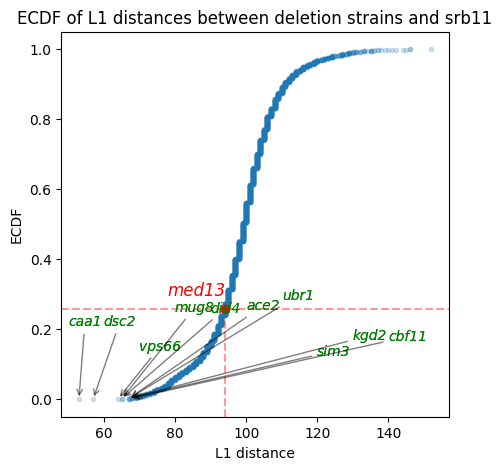

In [10]:
#create matlibplot figure
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(sorted_array, ecdf, marker='.', linestyle='none',alpha=0.2)
ax.set_xlabel('L1 distance')
ax.set_ylabel('ECDF')
ax.set_title('ECDF of L1 distances between deletion strains and srb11')
#vline at l1_med13 x and y is percentile/100
ax.axvline(x=l1_med13, ymin=0, ymax=percentile/100, color='red', linestyle='--',alpha=0.4)
ax.axhline(y=percentile/100, xmin=0, xmax=l1_med13, color='red', linestyle='--',alpha=0.4)
#text saying med13
ax.text(l1_med13-16,percentile/100+0.04, 'med13', color='red', fontsize=12, style='italic')
#mark it with a dot
ax.plot(l1_med13,percentile/100, marker='o', color='red', linestyle='none')
#print names of top 10 genes and connect lines
for i in range(len(top10_genes)):
    text_x = 50+i*10
    text_y = ecdf[i]+np.random.uniform(0.3,0.08)
    ax.annotate(top10_genes[i], (sorted_array[i], ecdf[i]), xytext=(text_x,text_y ), arrowprops=dict(arrowstyle="->", color='black',alpha = 0.5), color='green', fontsize=10, style='italic')
    #print text again without arrow
    ax.text(text_x,text_y, top10_genes[i], color='green', fontsize=10, style='italic')
fig.savefig(root + 'Figures/All figures/l1_distance_ecdf.svg', format='svg',dpi=400)
fig.savefig(root + 'Figures/All figures/l1_distance_ecdf.png', format='png',dpi=400)

In [11]:
%load_ext watermark
%watermark


Last updated: 2023-11-04T12:40:55.210110+00:00

Python implementation: CPython
Python version       : 3.9.0
IPython version      : 7.31.1

Compiler    : Clang 11.0.0 
OS          : Darwin
Release     : 21.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [12]:
%watermark --iversions



pandas    : 1.4.4
scipy     : 1.11.3
matplotlib: 3.8.0
numpy     : 1.23.4

